In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing


In [2]:
def load_files(path):
    loss = np.loadtxt(path+'training_loss.txt')
    acc = np.loadtxt(path+'training_accuracy.txt')
    domain = np.loadtxt(path+'domain_labels.txt')
    te_loss = np.loadtxt(path+'testing_loss.txt')
    te_acc = np.loadtxt(path+'testing_accuracy.txt')
    machine = np.loadtxt(path+'machine_labels.txt', dtype = str)
    Z = np.load(path+'Z_space.npy')
    args = np.loadtxt(path+'arguments.txt', dtype = str, delimiter = '\n')

    le =  preprocessing.LabelEncoder()
    le.fit(machine)
    machine_num = le.transform(machine)
    machine_num = np.concatenate((machine_num, [0])) #FIXME
   
    return loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args

In [3]:
def plot_loss_acc(loss, acc, te_loss, te_acc, pretraining):
    x = np.arange(0,len(loss))
    #plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(x, loss)
    plt.plot(x, te_loss)
    plt.legend(['Training Loss', 'Testing loss'])
    plt.title(pretraining+' Loss ')

    plt.subplot(1,2,2)
    plt.plot(x, acc)
    plt.plot(x, te_acc)
    plt.title(pretraining+' Accuracy ')
    plt.legend(['Training Accuracy', 'Testing Accuracy'])
    plt.ylim(0, 1)
    #plt.show()



In [4]:
ex1='2022-10-03 17:08:05.262385/'
ex2 ='2022-10-03 16:08:33.982757/'
ex3 ='2022-09-27 15:33:15.358339/'

In [5]:
ex ='2022-10-09 21:38:29.092510/'
ex = '2022-10-11 13:50:48.083335/'
ax = '2022-10-12 12:44:50.953692/'
#ex = '2022-10-11 11:40:10.018008/'

In [6]:
from matplotlib.colors import ListedColormap
def TSNE_funtion(perplexity, lr, n_iter, Z,domain, machine_num, title, produce_visuals=True):
    Z_embedded = TSNE(n_components=2, perplexity = perplexity, learning_rate= lr,init='random', n_iter =n_iter).fit_transform(Z)
    print(Z_embedded.shape)
    if produce_visuals:
        print(set(domain), set(machine_num))
        palette = ['red', 'blue', 'orange', 'green']
        plt.figure(figsize = (15, 10))
        plt.subplot(1,2,1)
        sns.scatterplot(x=Z_embedded[:, 0], y=Z_embedded[:, 1], hue=domain, palette=palette[:len(set(domain))]).set(title="HER 2 domain visualization") 
        plt.subplot(1,2,2)
        print(domain.shape, machine_num.shape)
        sns.scatterplot(x=Z_embedded[:513, 0], y=Z_embedded[:513, 1], hue = machine_num, palette=palette[:len(set(machine_num))]).set(title="HER 2 machine visualization")
        plt.show()
        
        Z_embedded2 = TSNE(n_components=3, perplexity = perplexity, learning_rate= lr,init='random', n_iter =n_iter).fit_transform(Z)
        print(Z_embedded2.shape)
        cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# # plot
# sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
        ax = plt.axes(projection='3d')
        ax.scatter3D(Z_embedded2[:513, 0], Z_embedded2[:513, 1], Z_embedded2[:513, 2], c=machine_num[:513], marker='o', cmap=palette[:len(set(domain))])')
        ax.set_xlabel("comp 1")
        ax.set_ylabel("comp 2")
        ax.set_zlabel("comp 3")

        #plt.title(title)
       

SyntaxError: EOL while scanning string literal (<ipython-input-6-195a1cb1e0c0>, line 23)

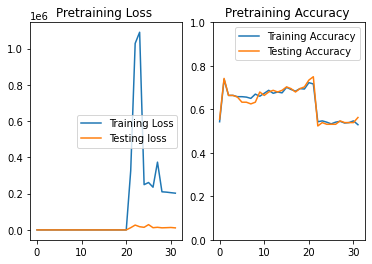

In [7]:
loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args = load_files(ex)
plot_loss_acc(loss[:32], acc[:32], te_loss[:32], te_acc[:32], 'Pretraining')

#loss_p, acc_p, domain_p, machine_p, machine_num_p, Z_p = load_files('positive/')

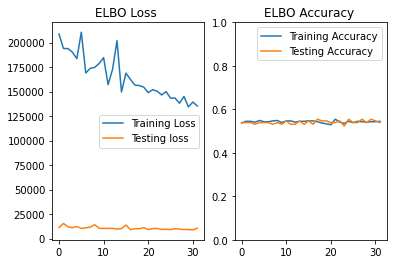

In [8]:
plot_loss_acc(loss[33:], acc[33:], te_loss[33:], te_acc[33:], 'ELBO')

In [374]:
from torch.utils.tensorboard import SummaryWriter
path ='../debug'
for exp in os.listdir(path):
    if ex[:17] in exp:
        experiment = exp
        path+='/'+exp
writer = SummaryWriter(path)
class_labels = domain
writer.add_embedding(Z,metadata=class_labels)    
    #+ex #/debug/'+ex
print(os.listdir(path))
#write_embeddings(x = batch_imgs.to(DEVICE))
writer.close()

['events.out.tfevents.1665510648.didsr-gpu11', 'events.out.tfevents.1665517174.didsr-gpu08.71123.0', 'events.out.tfevents.1665517202.didsr-gpu08.71123.1', 'events.out.tfevents.1665517212.didsr-gpu08.71123.2', '00000', 'projector_config.pbtxt', 'events.out.tfevents.1665517296.didsr-gpu08.71123.3', 'events.out.tfevents.1665517331.didsr-gpu08.71123.4', 'events.out.tfevents.1665523303.didsr-gpu08.71123.5', 'events.out.tfevents.1665523340.didsr-gpu08.71123.6', 'events.out.tfevents.1665523356.didsr-gpu08.71123.7', 'events.out.tfevents.1665523507.didsr-gpu08.71123.8', 'events.out.tfevents.1665523548.didsr-gpu08.71123.9', 'events.out.tfevents.1665523666.didsr-gpu08.71123.10', 'events.out.tfevents.1665523691.didsr-gpu08.71123.11', 'events.out.tfevents.1665523714.didsr-gpu08.71123.12', 'events.out.tfevents.1665523839.didsr-gpu08.71123.13', 'events.out.tfevents.1665523869.didsr-gpu08.71123.14', 'events.out.tfevents.1665524018.didsr-gpu08.71123.15']


In [9]:
def plot_histogram(domain_labels, machine_label):


    d1_machine = []
    d2_machine = []

    for i in range(0, len(domain_labels) - 1):

        if domain_labels[i] == 0:
            d1_machine.append(machine_label[i])
        elif domain_labels[i] == 1:
            d2_machine.append(machine_label[i])

    from matplotlib import pyplot as plt

    plt.subplot(2, 1, 1)
    plt.hist(d1_machine)
    plt.title('Class 1 Cancerous Tissue Scan Sources')

    plt.subplot(2, 1, 2)
    plt.hist(d2_machine)
    plt.title('Class 2 Cancerous Tissue Scan Sources')
    plt.show()
    # plt.savefig('./figures/hist_results'+str(epoch)+'.png')


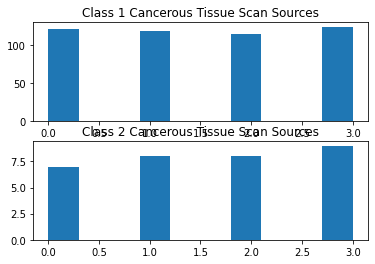

In [10]:
plot_histogram(domain[:513], machine_num)

In [11]:
# experiments = [ex1, ex2, ex3]
# legend_loss = []
# legend_acc = []
# plt.figure(figsize = (25, 25))
# for ex in experiments:
#     loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args = load_files(ex)
#     #print(args)
#     #plot_loss_acc(loss, acc, te_loss, te_acc)
#     x = np.arange(0,len(loss))
#     plt.subplot(2, 1, 1)
#     plt.plot(x, loss)
#     plt.plot(x, te_loss)
#     plt.title('Loss ')
#     legend_loss.append('Loss: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
#     legend_loss.append('Loss_te: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
    
#     plt.subplot(2,1,2)
#     plt.plot(x, acc)
#     plt.plot(x, te_acc)
#     plt.title('Accuracy ')
#     plt.ylim(0, 1)
#     legend_acc.append('Acc: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
#     legend_acc.append('Acc_te: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
# #print(len(legend))
# plt.subplot(2,1,1)
# plt.legend(legend_loss)
# plt.subplot(2,1,2)
# plt.legend(legend_acc)
# plt.show()

In [12]:
experiments = [ex]
Z.shape

(537, 250)

In [379]:
# perplexity, lr, n_iter

In [13]:
# for i in range(2, 80, 20):
#     title = 'Experiment: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5]
    
#     TSNE_funtion(i, 2, 450, Z,domain, machine_num,title, produce_visuals=True)


In [14]:
def machines_per_domain(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    for i in set(domain):
        ND=0
        H1=0
        H2=0
        FD=0

        for j in range(len(machine)):
            if domain[j] == i and machine[j]=='ND':
                ND+=1
            if domain[j] == i and machine[j]=='H1':
                H1+=1
            if domain[j] == i and machine[j]=='H2':
                H2+=1
            if domain[j] == i and machine[j]=='FD':
                FD+=1
        plt.subplot(1,4,i+1)    
        plt.bar([0, 2, 4, 6], [ND, H1, H2, FD])
        plt.xticks([0, 2, 4, 6], ['ND', 'H1', 'H2', 'FD'])
        plt.title(experiment_name+' Domain # ' +str(i))
        plt.ylim(0, 150)


    plt.show() 

/home/mariia.sidulova/domid1/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


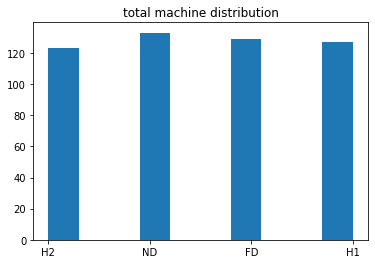

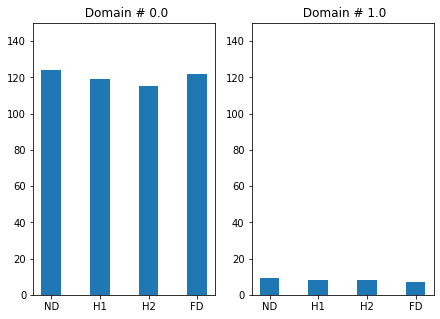

In [15]:
plt.hist(machine)
plt.title('total machine distribution')
machines_per_domain(domain, machine, '')
#machines_per_domain(domain_p, machine_p, 'Positive loss')

In [16]:
def domain_per_machine(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    machine_num = np.unique(machine)
    domain_names = np.unique(domain)
    counter=0
    c = 0
    print(len(domain_names), machine_num)
    for i in machine_num:

        d1 = 0
        d2 =0
        d3 =0


        for j in range(len(domain)-50):
            #print(i, j, domain[j], machine[j])
            if domain[j]==domain_names[0] and machine[j]==i:
                d1+=1
            if domain[j]== domain_names[1] and machine[j]==i:
                d2+=1
            try:
                if domain[j]==domain_names[2] and machine[j]==i:
                    d3+=1
            except:
                c+=1
        print([d1, d2, d3])
        plt.subplot(1,4,counter+1)    
        plt.bar([0, 2, 4], [d1, d2, d3])
        plt.xticks([0, 2, 4], ['D1', 'D2', 'D3'])
        plt.title(experiment_name+' Machine # ' +str(i))
        plt.ylim(0, 150)
        counter+=1


    plt.show() 

In [17]:
machine[4]

'H2'

2 ['FD' 'H1' 'H2' 'ND']
[116, 7, 0]
[112, 8, 0]
[111, 8, 0]
[116, 9, 0]


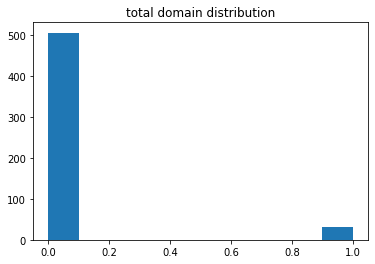

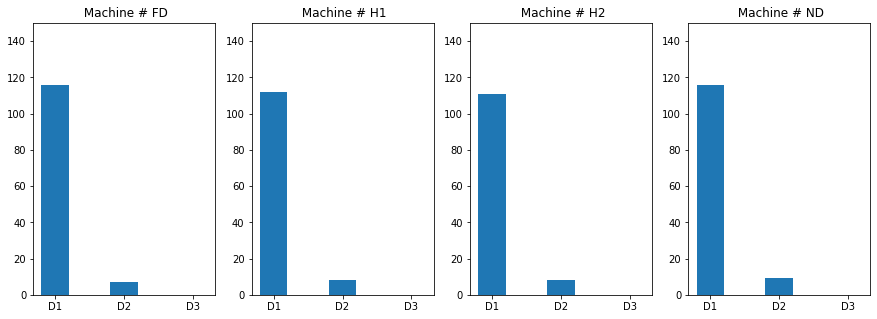

In [18]:
plt.hist(domain)
plt.title('total domain distribution')
domain_per_machine(domain, machine, '')